# **Names:** Boris Wu & David Björelind

**EIDs:** bbrwu2 & dbjorelind2

**Kaggle Team Name:** Suedi

# CS4487 - Course Project

Due date: Nov 30, 11:59pm

## Goal

The course project is the following:

### Predicting outcomes of schizophrenia patient

> The goal is to predict the 12-year outcomes of patients with schizophernia using 3-years of data collected after the first diagnosed episode.  The dataset contains two prediction tasks: 1) predict Suicide death within 12 year time-span; 2) predict treatment resistance to antipsychotic medication (if a patient becomes resistant to medication, than another medication Clozapine is prescribed). A good prediction model would help create early treatment models to identify potential future problems.

> There are two types of data: 1) cross-sectional data consists of patient measurements taken at a specific time point (12 years after the first diagnosis); 2) longitidual data consists of 3 years of measurements after the first episode.  For this problem, the cross-sectional data contains the class we want to predict.  The longitudinal data contains baseline information and monthly reports of symptoms and functioning for the first 3 years.


You only need to select one of these tasks (mortality or treatment resistance) for the course project. 

<span style="color:red">_**NOTE: This dataset is provided by the Psychiatry department HKU and contains some sensitive and propietary information. Do NOT redistribute this dataset to other people.**_</span>


## Groups
Projects should be done in Groups of 2.  To sign up for a group, go to Canvas and under "People", join one of the existing "Project Groups".  _For group projects, the project report must state the percentage contribution from each project member._

## Methodology
You are free to choose the methodology to solve the task.  In machine learning, it is important to use domain knowledge to help solve the problem.  Hence, instead of blindly applying the algorithms to the data you need to think about how to represent the data in a way that makes sense for the algorithm to solve the task. 


## Evaluation on Kaggle

The final evaluation will be performed on Kaggle. See the below code about the evaluation procedure.

**Note:** You can only submit 2 times per day to Kaggle!

## Project Presentation

Each project group needs to give a presentation at the end of the semester.  The presentation time is 8 minutes.  You _must_ give a presentation.

## What to hand in
You need to turn in the following things:

1. This ipynb file `CourseProject-2018.ipynb` with your source code and documentation. **You should write about all the various attempts that you make to find a good solution.**
2. Your final submission file to Kaggle.
3. The ipynb file `CourseProject-2018-final.ipynb`, which contains the code that generates the final submission file that you submit to Kaggle. **This code will be used to verify that your Kaggle submission is reproducible.**
4. Presentation slides.

Files should be uploaded to "Course Project" on Canvas.


## Grading
The marks of the assignment are distributed as follows:
- 40% - Results using various feature representations, dimensionality reduction methods, classifiers, etc.
- 20% - Trying out feature representations (e.g. adding/engineering additional features, combining features, time-series features) or methods not used in the tutorials.
- 15% - Quality of the written report.  More points for insightful observations and analysis.
- 15% - Project presentation
- 10% - Final ranking on the Kaggle test data (private leaderboard).

**Late Penalty:** 25 marks will be subtracted for each day late.

<hr>

## Getting started

The following code will get you started reading in the datasets, train a baseline classifier and evaluate it.

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)
import pandas as pd

C:\Users\Boris.Ping-Wu_UU.000\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Boris.Ping-Wu_UU.000\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Boris.Ping-Wu_UU.000\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module wi

## Load data

The zip file contains the following files:
  - **Mortality prediction task**
    - `mortality/mortality_suicide.csv` - class labels (suicide).
    - `mortality/mortality_baseline.csv` - longitudinal data.
    - `mortality/mortality_baseline_vars.csv` - descriptions of the baseline variables.
    - `mortality/mortality_training.csv` - indices for training sets for 10 experiment trials.
    - `mortality/mortality_testing.csv` - indices for test sets for 10 experiment trials.
  - **Treatment Resistance prediction task**
    - `treatres/clozapine_tr.csv` - class label (treatment resistance).
    - `treatres/clozapine_baseline.csv` - longitudinal data.
    - `treatres/clozapine_baseline_vars.csv` - descriptions of the baseline variables
    - `treatres/treatres_training.csv` - indices for training sets for 10 experiment trials.
    - `treatres/treatres_testing.csv` - indices for testing sets for 10 experiment trials


In [2]:
# Set this variable according to the task you will do.
#   True=suicide data, False=treatment resistance data
doMortality = True

Now load the data files, join the tables according to subject ID.

In [3]:
# codes for "Missing Values", which are convereted to nan
na_values = [777, 888, 999, '777', '888', '999']

if (doMortality):
    ### load the data on mortality ###################################################
    df_X = pd.read_csv('mortality/mortality_suicide.csv', na_values=na_values)
    df_L = pd.read_csv('mortality/mortality_baseline.csv', na_values=na_values)
    df_L_labels = pd.read_csv('mortality/mortality_baseline_vars.csv', na_values=na_values)

    # get the labels and HCScode (subject IDs)
    df_suic = df_X[['HCScode', 'Suicide_12']]    
    # select data_L by HCScodes in subj_suic
    df_L_part = df_L.loc[df_L['HCS_code'].isin(df_suic['HCScode'])]
    # merge data, and sort
    df = df_suic.set_index('HCScode').join(df_L_part.set_index('HCS_code'))
    # sort by HCScode
    df = df.sort_values("HCScode")
    # rename class variable name
    df.rename(index=str, columns={'Suicide_12': 'Y'}, inplace=True)
    
else:
    ### load the data on treatment resistance #########################################
    df_X = pd.read_csv('treatres/clozapine_tr.csv', na_values=na_values)
    df_L = pd.read_csv('treatres/clozapine_baseline.csv', na_values=na_values)
    df_L_labels = pd.read_csv('treatres/clozapine_baseline_vars.csv', na_values=na_values)

    # get HCS codes and labels
    df_tr = df_X[['HCS3', 'TR_nonTR_Inclusive']]
    # select data_L by available codes
    df_L_part = df_L.loc[df_L['HCS_code'].isin(df_tr['HCS3'])]
    # merge data
    df = df_tr.set_index('HCS3').join(df_L_part.set_index('HCS_code'))
    # remove nan values, and sort
    df = df[(df.TR_nonTR_Inclusive >= 0)].sort_values("HCS3")
    # rename class variable name
    df.rename(index=str, columns={'TR_nonTR_Inclusive': 'Y'}, inplace=True)
    df['Y'] = df['Y'].astype(int)

C:\Users\Boris.Ping-Wu_UU.000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (26,27,51,248,632,776,812,848,934,935,938,939,943,944,945,946,947,1009,1010,1011,1012,1013,1014,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1040,1041,1042,1043,1044,1725,2033,2039,2040,2044,2160,2225,2239) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


View the processed dataframe `df`. You can see the description of the variables in the "vars" csv file.

In [4]:
print(df.shape)
df

(1234, 2257)


,Y,HCS10_code,HCS10_sample,EASYp_code,Sex,Matched_pair,Yr10_FU,Yr10_sample,Filter,Filter2,...,eMeds_NA,eMeds_MIS,Adjunctive_no,SS_attempt_all,V_attempt_all,IP_last6M,DDD_last6M,M36_Fulltime,regression_datediff,regression_yr
HCScode,,,,,,,,,,,,,,,,,,,,,
CP001a,0,CP001a,1,ET30101,2,1,01/05/2012,1,1,0,...,0,0,3,0,0,0,0.09375,NaN,1625,2001
CP001b,0,NaN,0,NaN,2,1,07/27/2008,0,0,1,...,0,0,4,1,0,0,0.4000000000000001,0.0,398,1998
CP002a,0,NaN,0,ET30340,2,2,03/23/2013,0,1,0,...,0,0,3,0,0,0,1.5,0.0,2098,2003
CP002b,0,NaN,0,NaN,2,2,11/20/2008,0,0,1,...,0,0,3,0,0,1,1.2416666666666667,1.0,514,1998
CP006a,0,NaN,0,ET30214,2,3,09/26/2012,0,1,0,...,0,0,5,1,1,0,3,0.0,1920,2002
CP006b,1,NaN,0,NaN,2,3,11/02/2009,0,0,1,...,15,0,3,1,1,0,,NaN,,1999
CP007a,0,NaN,0,ET30337,2,4,12/19/2012,0,1,0,...,0,0,3,0,0,1,1.5,0.0,2004,2002
CP007b,0,NaN,0,NaN,2,4,07/02/2009,0,0,1,...,0,0,2,0,0,0,0,0.0,738,1999
CP008a,0,NaN,0,ET30139,2,5,06/12/2012,1,1,0,...,18,0,1,0,0,0,,NaN,,2002


## Experiment Setup and Helper Functions

Since the dataset is relatively small, we will use 10 experiment trials with random training/test sets to do the evaluation.  In each random trial, 80% of the data is for training and the remaining 20% is for testing.

In [5]:
if (doMortality):
    # load cross-validation sets for Mortality data
    tmp = pd.read_csv('mortality/mortality_training.csv')
    train_inds = tmp.values[:,1:]
    tmp = pd.read_csv('mortality/mortality_testing.csv')
    test_inds = tmp.values[:,1:]
else:
    # load cross-validation sets for Treatment Resistance data
    tmp = pd.read_csv('treatres/treatres_training.csv')
    train_inds = tmp.values[:,1:]
    tmp = pd.read_csv('treatres/treatres_testing.csv')
    test_inds = tmp.values[:,1:]
    
print(train_inds.shape)
print(test_inds.shape)

(10, 987)
(10, 247)


We will evaluate the classifiers using ROC curves, which plot the false positive rate (FPR) versus the true positive rate (TPR) as the classifier threshold is varied. This can give a better characterization of the tradeoff between perfect detection and false detection.  The area-under-curve (AUC) measures how good the classifier is, where larger values are better.  More information can be found [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic|here:).
We will use mean AUC (over the random trials) as the evaluation criteria. An example is shown later.

The following function will run the 10 experiment trials. You need to pass the classifier function `clf` and the data matrix `X`.  The classifier function `clf` takes in the training data `trainX` and labels `trainY` and the test data `testX`, and outputs the label scores for the test data `testYscores`.  Note that this is not the prediction, but the confidence or probability of class 1.  For each trial, the ROC curve and AUC will be computed from the predicted scores.

In [6]:
shape(train_inds)

(10, 987)

In [7]:
# pass the classifier function clf and the data matrix X
# the function will automatically extract the training/test splits, 
# and then train and test the classifer.
def run_cv_experiment(clf, X):
    
    # NOTE: uses dataY, test_inds, train_inds from calling scope since these don't change.
    
    T = len(test_inds[0])
    allout = []

    # run CV experiment
    for t in range(10):
        # get the training/testing data
        train_index = train_inds[t]
        test_index  = test_inds[t]
        trainX = X[train_index]
        trainY = dataY[train_index]
        testX  = X[test_index]
        testY  = dataY[test_index]
    
        # your function is called here!
        testYscores = clf(trainX, trainY, testX)
         
        # compute ROC curve
        a = metrics.roc_auc_score(testY, testYscores)
        print("*** CV {}: test auc = {}".format(t, a))
    
        fpr, tpr, _ = metrics.roc_curve(testY, testYscores)
        aa = metrics.auc(fpr, tpr)  # it's the same as a
        #print(aa)
    
        # save info
        allout.append({
                'auc': a, 
                'fpr': fpr, 
                'tpr': tpr, 
                'testY': testY, 
                'testYscores': testYscores,
            })
        
    # return all the information
    return(allout)

        

The following function will plot the ROC curves for each trial, as well as the average curve and standard-deviation.

In [8]:
def plotROCs(allout):
    # for interpolation
    base_fpr = linspace(0,1,101)
    tprs = []
    aucs = []
    
    # plot the individual ROCs
    plt.figure()
    plt.plot([0, 1], [0, 1], 'r:')
    for x in allout:
        plt.plot(x['fpr'], x['tpr'], 'b-', alpha=0.2)
        tpr2 = interp(base_fpr, x['fpr'], x['tpr'])
        tprs.append(tpr2)
        aucs.append(x['auc'])

    # compute the mean AUC
    meanauc = mean(aucs)
        
    tprs = array(tprs)
    # compute the mean and stddev of the ROC curve at each FPR
    tprs_mean = tprs.mean(axis=0)
    tprs_std  = tprs.std(axis=0)

    # +1/-1 standard deviation
    tprs_lower = tprs_mean-tprs_std
    tprs_upper = tprs_mean+tprs_std

    # plot
    plt.plot(base_fpr, tprs_mean, 'k-')
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)
    plt.title('mean AUC={}'.format(meanauc))
    plt.grid(True)
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    return(meanauc)

The following function will save the test scores into a csv file for submission to Kaggle. You need to pass the output of the `run_cv_experiment` function.

In [9]:
# the Kaggle CSV file contains multiple columns, where each column is one experiment trial
def write_csv_kaggle(fname, allout):
    # save CSV files
    T = len(allout[0]['testYscores'])

    # make header
    ids = range(1,T+1)
    headers = ['ID']
    for r in range(1,11):
        headers.append('Run {}'.format(r))
    
    # collect data
    tmp = array(ids)
    for t in range(10):
        tmp = c_[tmp, allout[t]['testYscores']]
    
    # a prediction
    tmpdf = pd.DataFrame(tmp, columns=headers, copy=True)
    tmpdf['ID'] = tmpdf['ID'].astype(int)

    tmpdf.to_csv(fname, index=False)

## Baseline Experiment

Let's learn a baseline classifier. First, extract the features from the data frame. `dataY` contains the ground-truth labels, and `dataX` contains the matrix of feature vectors.

In [10]:
# names of features from baseline file (longitudinal data).
featnames = ['Sex', 'Age_onset', 'Ageatpresent', 'Dx_cat', 'Yrs_edu', 
             'Occup_impair', 'Smoker', 'Migration', 'life_event1', 'Disengagement', 
             'Pos_mth', 'Neg_mth', 'Aff_mth', 'Clozapine', 'totno_antipsy']

# extract data from dataframe (make a copy so we don't corrupt it later)
dataY = df['Y'].values[:]
dataX = df[featnames].values[:]
dataY.shape, dataX.shape

((1234,), (1234, 15))

Next, define our classifier.  There are some missing values, so we will use the simple imputer to fill in the values.

**NOTE:** for fairness, any method that requires training data (e.g., clustering, some pre-processing methods, dimensionality reduction, classification) should be called in this function.  That way the training is not performed on the test set.  Ffeature extraction that does not require training data, e.g., one-hot-encoding, can be performed outside of this function.\

In [11]:
def myclassifier(trainX, trainY, testX):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # fill in the missing values with the most frequent entry
    imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent')
    trainXi = imp.fit_transform(trainX)
    testXi  = imp.transform(testX)
    
    # setup the LR classifier -- maximize AUC when doing the cross-validation
    cla = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1, 
                                           scoring='roc_auc', verbose=True)
    # fit the classifier
    cla.fit(trainXi, trainY)
    
    # predict the scores, and return them
    testYscores = cla.predict_proba(testXi)[:,1]
    return(testYscores)

Third, run on the 10 experiment trials.

In [ ]:
# run the experiment, and save the output
allout = run_cv_experiment(myclassifier, dataX)

Fourth, plot the ROC curves.  The light-blue lines are the individual ROC curves, while the black line is the average curve.  The shaded gray region is one standard-deviation of the curve.  The red dotted line is the ROC curve for random chance classifier.

In [ ]:
meanauc = plotROCs(allout)

The AUC of the baseline is 0.708 for the mortality task, and 0.713 for the treatment resistance task.

Fifth, put the data into a CSV file for submission to Kaggle.

In [ ]:
write_csv_kaggle('mysub_baseline.csv', allout)

<hr>

The above classifier and feature set should be enough to get you started. You can try other classifiers or methods, as well as other features in the CSV file.  Note that some features are categorical, so some additional feature pre-processing might help.  Also, some features are time-series (labeled as "`M##_???`", where `##` are the month numbers (1-36).

A final note on the experiment setup: you shiould not select parameters by cross-validating across the 10 experiment trials, i.e., cross-validation should only be performed inside each experiment trial. Here we are interested in how well a particular method (including the parameter selection method) generalizes across different instances of the dataset.

# OUR CODE BEGINS HERE

Below are the two classifiers that we will try in this project. Judging by experience from earlier tutorials, the different non-linear classifiers didn't differ significantly (often a few percentage points). From the beginning, we wanted to try out 4 classifiers, including some ensemble methods as well, but after having gotten started and realizing the complexity of our method we decided to cut down on the classifiers and chose Logistic Regression and kernelSVM as we believe these two capture the main categories of classifiers very well - logreg being linear and kernel SVM being non-linear however both best suited for binary classifying.

In [12]:
def myclassifier(trainX, trainY, testX):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # setup the LR classifier -- maximize AUC when doing the cross-validation
    cla = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1, 
                                           scoring='roc_auc', verbose=True)
    # fit the classifier
    cla.fit(trainX, trainY)
    
    # predict the scores, and return them
    testYscores = cla.predict_proba(testX)[:,1]
    return(testYscores)

In [13]:
def svmclf(trainX, trainY, testX):
    # input is the training data (trainX,trainY) and the test data (testX)
    # for one experiment trial.
    
    # setup the LR classifier -- maximize AUC when doing the cross-validation
    ## SVM model using polynomial kernel 
    ## cross validation for parameters C and degree
    svmcv = svm.SVC(kernel='poly', C=10, degree = 2, probability = True)
    svmcv.fit(trainX, trainY);

    # predict the scores, and return them
    testYscores = svmcv.predict_proba(testX)[:,1]
    return(testYscores)

# DIM REDUCTION

When we first got started with dim-reduction, one of the problems was dealing with the non-float values of the dataset. Thus, we chose to use get_dummies and transform the dataset into one that a KPCA-model could handle, and filled in the NaN values in the same way presented above in the baseline test.

In [14]:
# Transforming data
df_dum = pd.get_dummies(df.iloc[:,1:2256]) # Getting dummies for non-number value features
imp = preprocessing.Imputer(missing_values=nan, strategy='most_frequent', verbose=True)
df_imp = imp.fit_transform(df_dum.values) # Filling in missing values

C:\Users\Boris.Ping-Wu_UU.000\Anaconda3\lib\site-packages\sklearn\preprocessing\imputation.py:347: UserWarning: Deleting features without observed values: [786]
  "observed values: %s" % missing)


In [15]:
def my_kpca(gamma, degree, data):
    kpca = decomposition.KernelPCA(n_components=25, kernel='poly', gamma=gamma, degree=degree, coef0=0)
    W = kpca.fit_transform(data)
    return(W)

Having done a couple of experiments using random values for kpca, it was time to tune the model. When testing some random parameters for the KPCA, we found that in general poly kernel gave better result, and n_components varying from 20 to 1000 didn't change the results significantly (some rough tuning partly conducted listening to our guts and observing some rough experiments). We reasoned that it would take a very long time to test the auc-result from a large number of n_components, kernels, gammas and degrees and chose to fine-tune only degree and gammas and so we fixed the kernel to poly and n_components to 25.

In [23]:
#Tuning KPCA parameters gamma and degree. Choosing to use n_components = 25 
# ..as it feels sufficient yet narrows down the dims by a whole lot from 98k dimensions
#Will tune the kpca model using the given myclassifier (logreg) in baseline test above
degs = [1,2,3]
gammas = logspace(-3,0,6)
means = []
for deg in degs:
    for gamma in gammas:
        W = my_kpca(gamma, deg, df_imp)
        allout = run_cv_experiment(myclassifier,W)
        aucs = []
        for i in range(len(allout)):
            aucs.append(allout[i]['auc'])
        means.append(mean(aucs))
        print('mean auc: {}, gamma{}, deg: {}'.format(mean(aucs), gamma, deg))

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.1s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.1s finished


*** CV 0: test auc = 0.7482758620689655


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished


*** CV 1: test auc = 0.742816091954023


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished


*** CV 2: test auc = 0.7709770114942529


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s finished


*** CV 3: test auc = 0.6795977011494253


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished


*** CV 4: test auc = 0.7227011494252873


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 5: test auc = 0.7275862068965517


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished


*** CV 6: test auc = 0.653448275862069


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished


*** CV 7: test auc = 0.6252873563218391


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.3s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished


*** CV 8: test auc = 0.5758620689655173


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished


*** CV 9: test auc = 0.7298850574712643
mean auc: 0.6976436781609195, gamma0.001, deg: 1


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.8s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.9s finished


*** CV 0: test auc = 0.7514367816091955


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished


*** CV 1: test auc = 0.6304597701149426


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


*** CV 2: test auc = 0.7735632183908046


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished


*** CV 3: test auc = 0.6764367816091954


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s finished


*** CV 4: test auc = 0.7347701149425288


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.2s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.8s finished


*** CV 5: test auc = 0.7293103448275862


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.2s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.8s finished


*** CV 6: test auc = 0.6568965517241379


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.4s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished


*** CV 7: test auc = 0.6307471264367817


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished


*** CV 8: test auc = 0.5695402298850575


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.8s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished


*** CV 9: test auc = 0.735919540229885
mean auc: 0.6889080459770114, gamma0.003981071705534973, deg: 1


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished


*** CV 0: test auc = 0.7603448275862069


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s finished


*** CV 1: test auc = 0.6347701149425287


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished


*** CV 2: test auc = 0.7836206896551724


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 3: test auc = 0.6879310344827586


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 4: test auc = 0.7456896551724137


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 5: test auc = 0.7307471264367816


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 6: test auc = 0.675287356321839


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 7: test auc = 0.6272988505747127


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 8: test auc = 0.578448275862069


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 9: test auc = 0.7307471264367816
mean auc: 0.6954885057471264, gamma0.015848931924611134, deg: 1


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 0: test auc = 0.7658045977011494


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 1: test auc = 0.6330459770114942


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 2: test auc = 0.7945402298850575


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 3: test auc = 0.6954022988505747


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 4: test auc = 0.7491379310344828


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 5: test auc = 0.728735632183908


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 6: test auc = 0.6778735632183908


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished


*** CV 7: test auc = 0.6336206896551725


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 8: test auc = 0.5761494252873564


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 9: test auc = 0.7290229885057472
mean auc: 0.6983333333333334, gamma0.0630957344480193, deg: 1


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 0: test auc = 0.7580459770114942


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 1: test auc = 0.610632183908046


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 2: test auc = 0.7977011494252872


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished


*** CV 3: test auc = 0.6660919540229885


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 4: test auc = 0.6997126436781609


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 5: test auc = 0.6241379310344828


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 6: test auc = 0.6862068965517242


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished


*** CV 7: test auc = 0.5308908045977011


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 8: test auc = 0.5627873563218391


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


*** CV 9: test auc = 0.656896551724138
mean auc: 0.6593103448275861, gamma0.25118864315095796, deg: 1


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 0: test auc = 0.757183908045977


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 1: test auc = 0.6100574712643678


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 2: test auc = 0.7899425287356322


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


*** CV 3: test auc = 0.6548850574712644


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 4: test auc = 0.6732758620689656


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 5: test auc = 0.628735632183908


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 6: test auc = 0.6623563218390804


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 7: test auc = 0.5254310344827586


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 8: test auc = 0.558764367816092


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 9: test auc = 0.6758620689655173
mean auc: 0.6536494252873564, gamma1.0, deg: 1


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


*** CV 0: test auc = 0.7833333333333333


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 1: test auc = 0.4778735632183908


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


*** CV 2: test auc = 0.7123563218390805


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 3: test auc = 0.6385057471264367


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 4: test auc = 0.7419540229885058


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 5: test auc = 0.5867816091954023


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 6: test auc = 0.5991379310344828


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 7: test auc = 0.5410919540229885


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 8: test auc = 0.5291666666666667


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


*** CV 9: test auc = 0.7206896551724139
mean auc: 0.6330890804597702, gamma0.001, deg: 2


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 0: test auc = 0.7850574712643679


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 1: test auc = 0.4841954022988506


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 2: test auc = 0.7048850574712644


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 3: test auc = 0.6870689655172414


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 4: test auc = 0.7474137931034482


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


*** CV 5: test auc = 0.5801724137931036


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 6: test auc = 0.6137931034482759


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 7: test auc = 0.5347701149425288


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 8: test auc = 0.5311781609195403


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 9: test auc = 0.7413793103448276
mean auc: 0.6409913793103449, gamma0.003981071705534973, deg: 2


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 0: test auc = 0.7847701149425288


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 1: test auc = 0.4807471264367816


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 2: test auc = 0.6910919540229885


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 3: test auc = 0.6379310344827587


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 4: test auc = 0.7370689655172413


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 5: test auc = 0.6068965517241379


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 6: test auc = 0.5959770114942529


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 7: test auc = 0.5428160919540229


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 8: test auc = 0.5329022988505747


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 9: test auc = 0.735632183908046
mean auc: 0.6345833333333333, gamma0.015848931924611134, deg: 2


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 0: test auc = 0.8022988505747126


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 1: test auc = 0.48247126436781607


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 2: test auc = 0.7094827586206897


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 3: test auc = 0.6933908045977011


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 4: test auc = 0.7316091954022989


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 5: test auc = 0.5818965517241379


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 6: test auc = 0.6112068965517241


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 7: test auc = 0.549712643678161


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 8: test auc = 0.5323275862068966


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.9s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


*** CV 9: test auc = 0.7232758620689655
mean auc: 0.6417672413793103, gamma0.0630957344480193, deg: 2


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s finished


*** CV 0: test auc = 0.7787356321839081


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 1: test auc = 0.4856321839080459


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 2: test auc = 0.6994252873563218


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.9s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


*** CV 3: test auc = 0.6864942528735632


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 4: test auc = 0.7652298850574712


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 5: test auc = 0.5945402298850575


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 6: test auc = 0.6123563218390805


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 7: test auc = 0.5419540229885057


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 8: test auc = 0.523132183908046


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 9: test auc = 0.7333333333333334
mean auc: 0.6420833333333333, gamma0.25118864315095796, deg: 2


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 0: test auc = 0.7813218390804598


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 1: test auc = 0.4862068965517241


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 2: test auc = 0.6977011494252874


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 3: test auc = 0.6568965517241379


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 4: test auc = 0.7422413793103448


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


*** CV 5: test auc = 0.5669540229885057


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 6: test auc = 0.6051724137931034


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 7: test auc = 0.5293103448275862


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 8: test auc = 0.5271551724137931


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 9: test auc = 0.7347701149425288
mean auc: 0.632772988505747, gamma1.0, deg: 2


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 0: test auc = 0.7364942528735632


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 1: test auc = 0.5405172413793102


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 2: test auc = 0.7327586206896552


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 3: test auc = 0.6241379310344828


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


*** CV 4: test auc = 0.7057471264367816


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


*** CV 5: test auc = 0.6376436781609195


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished


*** CV 6: test auc = 0.6077586206896551


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


*** CV 7: test auc = 0.5652298850574713


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 8: test auc = 0.5718390804597702


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


*** CV 9: test auc = 0.710344827586207
mean auc: 0.6432471264367816, gamma0.001, deg: 3


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s finished


*** CV 0: test auc = 0.7333333333333333


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 1: test auc = 0.5577586206896552


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 2: test auc = 0.7043103448275863


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 3: test auc = 0.6238505747126437


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


*** CV 4: test auc = 0.6956896551724139


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 5: test auc = 0.621264367816092


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 6: test auc = 0.5982758620689654


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished


*** CV 7: test auc = 0.5643678160919541


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.8s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished


*** CV 8: test auc = 0.531896551724138


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished


*** CV 9: test auc = 0.696264367816092
mean auc: 0.6327011494252874, gamma0.003981071705534973, deg: 3


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


*** CV 0: test auc = 0.7422413793103448


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


*** CV 1: test auc = 0.5264367816091954


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 2: test auc = 0.7235632183908046


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished


*** CV 3: test auc = 0.631896551724138


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 4: test auc = 0.6962643678160919


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.4s finished


*** CV 5: test auc = 0.6195402298850574


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 6: test auc = 0.610919540229885


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


*** CV 7: test auc = 0.5778735632183909


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 8: test auc = 0.5508620689655173


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 9: test auc = 0.696551724137931
mean auc: 0.6376149425287356, gamma0.015848931924611134, deg: 3


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


*** CV 0: test auc = 0.7422413793103448


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 1: test auc = 0.5341954022988505


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 2: test auc = 0.7295977011494252


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


*** CV 3: test auc = 0.6298850574712643


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 4: test auc = 0.6971264367816092


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 5: test auc = 0.6152298850574713


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 6: test auc = 0.5971264367816091


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 7: test auc = 0.5695402298850575


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


*** CV 8: test auc = 0.5698275862068967


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


*** CV 9: test auc = 0.6925287356321839
mean auc: 0.6377298850574713, gamma0.0630957344480193, deg: 3


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


*** CV 0: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


*** CV 1: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.2s finished


*** CV 2: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished


*** CV 3: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


*** CV 4: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


*** CV 5: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


*** CV 6: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


*** CV 7: test auc = 0.6192528735632183


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.2s finished


*** CV 8: test auc = 0.5341954022988505


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


*** CV 9: test auc = 0.5
mean auc: 0.5153448275862069, gamma0.25118864315095796, deg: 3


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


*** CV 0: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


*** CV 1: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished


*** CV 2: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


*** CV 3: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


*** CV 4: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished


*** CV 5: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


*** CV 6: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


*** CV 7: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished


*** CV 8: test auc = 0.5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.5s


*** CV 9: test auc = 0.5
mean auc: 0.5, gamma1.0, deg: 3


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished


In [24]:
max(means)

0.6983333333333334

We found from the test above that degree = 1 and gamma = 0.063095 gave the best result (auc = 0.6983..). We will now use KPCA with these values to train a kernel SVM, hoping that the dim reduction would speed up the process. 

In [17]:
W= my_kpca(0.06309573, 1, df_imp)
shape(W)

(1234, 25)

In [30]:
## using the values which gave the highest auc from kpca tuning above and run experiment with SVM-kernel
allout = run_cv_experiment(svmclf,W)


*** CV 0: test auc = 0.7482758620689656
*** CV 1: test auc = 0.46580459770114946
*** CV 2: test auc = 0.7201149425287356
*** CV 3: test auc = 0.6353448275862069
*** CV 4: test auc = 0.7206896551724138
*** CV 5: test auc = 0.6925287356321839
*** CV 6: test auc = 0.646551724137931
*** CV 7: test auc = 0.660632183908046
*** CV 8: test auc = 0.614655172413793
*** CV 9: test auc = 0.7551724137931035


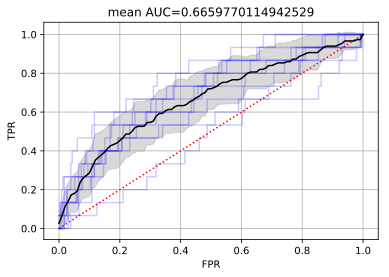

In [31]:
meanauc = plotROCs(allout)

Reflections on Dim reduction
The process of developing a dim reduction model was much more difficult than we had thought. We had to tackle problems such as dummying variabes which weren't represented in numbers, tune the dimreduction model in a reasonable way, and we had no idea how the classifier would work on the processed data. The SVM model took a really long time even though we had reduced the dimensions from ~98000 (after dummying) to 25 dimensions.

The results weren't that great, with the SVM kernel only achieving 69% mean AUC.

# ATTEMPT AT CLUSTERING

In [37]:
W= my_kpca(0.06309573, 1, df_imp)

In [38]:
W_train = W[train_inds[0]]
W_test = W[test_inds[0]]

In [39]:
#K-Means with 3 clusters
# (automatically does 10 random initializations)
km = cluster.KMeans(n_clusters=2, random_state=4487, n_jobs=-1)
km.fit(W_train) # cluster data, and return labels
Yp = km.predict(W_test)
cc = km.cluster_centers_ # the cluster centers
cl = km.labels_ # labels also stored here


In [40]:
list(Yp).count(0)

247

Clustering predicted all 0's.
Will not move further with this method after having tried creating a 'mycluster' function and finding it difficult to make it work with the experiment.

# FINDING THE MOST IMPORTANT FEATURES

Looking at the data, it looks like most of it it nonsense... Therefore we want to remove most of the features from the data, so that that we finally use is data that can indicate some trend...

The dates in the datafile can't really be used, since they are represented as strings. We think that some important trends can be found there. Therefore, we made an algoriths that replaces dates with appropriate ints, and categorizes other strings.

In [16]:
## Definging a function to replace date with integer representation and other strings with approprite categorizations
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False
    
def RepresentsFloat(s):
    try: 
        float(s)
        return True
    except ValueError:
        return False
    
def isNaN(num):
    return num != num

def categorizeData(df):
    trans_df = df
    
    #Loop for every collumn
    for c in enumerate(df.iloc[0,:]):
        if isinstance(c[1], str) and len(c[1]) == 10: #detecting date
           
                #Loop for every entry in collumn
                for k in enumerate(df.iloc[:,c[0]]):
                    
         
                    if isinstance(k[1], str) and len(k[1]) == 10:
                        trans_df.iloc[k[0],c[0]] = (float(k[1][6:10])*10000+float(k[1][3:5])*100+float(k[1][0:2]))/20000000
                    else:
                        trans_df.iloc[k[0],c[0]] = 999
                               
        elif RepresentsFloat(c[1]) and isinstance(c[1], str): #Replace string as ints with float
            for r in enumerate(df.iloc[:,c[0]]):
                #if (isinstance(r[1], str) and (r[1] != '' or r[1] != ' ')) or not isNaN(r[1]):
                if (isinstance(r[1], str) and RepresentsFloat(r[1]) and r[1] != '' and r[1] != ' '):
                    trans_df.iloc[r[0],c[0]] = float(r[1])
                elif r[1] == '' and r[1] == ' ' :
                    trans_df.iloc[r[0],c[0]] = 999
                    
        elif RepresentsFloat(c[1]) and isinstance(c[1], integer): # Replace ints with float
            for r in enumerate(df.iloc[:,c[0]]):
                trans_df.iloc[r[0],c[0]] = float(r[1])   
            
        elif (not isinstance(c[1], integer) and not isinstance(c[1], float)) : #or (c[1] == '')): #detecting string
            unique = []
            #Loop for every entry in collumn
            for k in enumerate(df.iloc[:,c[0]]):
                if k[1] not in unique:
                    unique.append(k[1])
                    
            for r in enumerate(df.iloc[:,c[0]]):
                if not isNaN(r[1]):
                    index = float(unique.index(r[1]))
                    trans_df.iloc[r[0],c[0]] = index
                else:
                    trans_df.iloc[r[0],c[0]] = 999
    
    return(trans_df)

In [17]:
## Calling the above function
df_trans = categorizeData(df)
print(df_trans)

            Y HCS10_code  HCS10_sample EASYp_code  Sex  Matched_pair  Yr10_FU  \
HCScode                                                                         
CP001a    0.0          0           1.0          0  2.0           1.0  1.00603   
CP001b    0.0        999           0.0        999  2.0           1.0  1.00414   
CP002a    0.0        999           0.0          2  2.0           2.0  1.00662   
CP002b    0.0        999           0.0        999  2.0           2.0   1.0041   
CP006a    0.0        999           0.0          3  2.0           3.0  1.00613   
CP006b    1.0        999           0.0        999  2.0           3.0  1.00451   
CP007a    0.0        999           0.0          4  2.0           4.0   1.0061   
CP007b    0.0        999           0.0        999  2.0           4.0  1.00451   
CP008a    0.0        999           0.0          5  2.0           5.0  1.00606   
CP008b    0.0        999           0.0        999  2.0           5.0  1.00402   
CP009a    0.0        999    

After calling the algoriths there still seems to be some strings and NaN values in the matrix. Looping it though to replace the last ones of the data point

In [18]:
## Removing some additional Strings that the algoriths didn't handle
for k in enumerate(df_trans.iloc[:,0]):
    for i in enumerate(df_trans.iloc[0,:]):
        if isinstance(df_trans.iloc[k[0],i[0]], str) and RepresentsFloat(df_trans.iloc[k[0],i[0]]):
            df_trans.iloc[k[0],i[0]] = float(df_trans.iloc[k[0],i[0]])
        elif isNaN(df_trans.iloc[k[0],i[0]]) :
            df_trans.iloc[k[0],i[0]] = 999
        elif isinstance(df_trans.iloc[k[0],i[0]], str):
            df_trans.iloc[k[0],i[0]] = 999

In [19]:
## Finding most important features by using Lasso with cross vaildation
las = linear_model.LassoCV(tol=0.01, verbose=True, n_jobs=-1)
las.fit(df_trans, dataY)

print("alpha =", las.alpha_)
print("w =", las.coef_)

............................................................................................................................................................................................................................................................................................................

alpha = 2.4638378072860476
w = [ 0. -0.  0. ...  0. -0. -0.]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.9s finished


In [20]:
logreg = linear_model.LogisticRegressionCV(Cs = logspace(-4,4,20), cv = 5, n_jobs=-1, scoring='roc_auc')

logreg.fit(df_trans,dataY)

LogisticRegressionCV(Cs=array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]),
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=-1, penalty='l2', random_state=None, refit=True,
           scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)

After trying some different classification methods, it seems that logistic regression is the most successful in finding the best features.

After that we list the different coefficients to see which ones have the highest weight. We picked all the ones that the LR didn't remove completely, which was 20 features. This is 1% of the original data!

In [21]:
## Taking a look at what features contributes the most and sorts them
coef = []
for i in enumerate(logreg.coef_[0]):
    k = abs(i[1])
    coef.append(k)

    print("%s : %s " % (df_L_labels.iloc[i[0],0], i[1]))
    
coef.sort(reverse = True)

HCS_code : 0.0003367075281711628 
HCS10_code : -0.0009679155910539907 
HCS10_sample : 5.835789093823792e-06 
EASYp_code : 0.002081750981643493 
Sex : -1.9899356675417947e-05 
Matched_pair : -0.0006409063587307094 
Yr10_FU : 1.0140494339177257e-07 
Yr10_sample : 1.9161616400186086e-05 
Filter : -6.6219610011160865e-06 
Filter2 : 6.709551272432638e-06 
Ageat1stpre : 0.00021619603149388637 
Age_onset : 0.0002556649531802367 
Age_onset_recode1 : 3.012376761904926e-05 
Ageatpresent : 0.0003060405748651605 
DOB : -3.343070644789178e-08 
Dx : -0.0023358319251857557 
Dx_cat : 0.0001315682541874902 
Dx_recode1 : 8.75902713162488e-08 
Schiz : -3.0298811978090088e-05 
Dx_bad_nos : -3.01236314354583e-05 
Dx_4gp : 6.383670278752336e-05 
Dx_5gp : 6.383670278752336e-05 
ICD_code : -0.00025406836305012846 
Yrs_edu : -0.0006317447952438938 
Occup_impair : -0.00023491090200307137 
Highestpre_occup : -0.0012944941345541 
Highest_occup_recode : -0.0012638936014495498 
High_occup_regroup : -0.0028001828629

M3_hdose2 : -3.7054911934436685e-05 
M4_hdose2 : 0.00014277872228780818 
M5_hdose2 : 0.00044149520689330774 
M6_hdose2 : 0.00032542102476256884 
M7_hdose2 : 0.0005899246958239919 
M8_hdose2 : 0.0002909409065495581 
M9_hdose2 : 0.00013821710785345717 
M10_hdose2 : -0.0001726914063013195 
M11_hdose2 : 5.30195409307235e-05 
M12_hdose2 : -0.00011572173977324781 
M13_hdose2 : 0.0003620024427175964 
M14_hdose2 : -0.00034825741688777905 
M15_hdose2 : -0.0006057511646447291 
M16_hdose2 : 0.00033358028015905144 
M17_hdose2 : 0.00020680208975207637 
M18_hdose2 : 0.00016404965540692357 
M19_hdose2 : -0.00011987921266202201 
M20_hdose2 : -7.947054812869265e-05 
M21_hdose2 : 1.398391178763041e-05 
M22_hdose2 : 0.0005485943301321439 
M23_hdose2 : 0.00025299562861850604 
M24_hdose2 : 0.00011075395505653133 
M25_hdose2 : -9.748704284322532e-05 
M26_hdose2 : 0.00016689033899812918 
M27_hdose2 : 0.0002925656355779887 
M28_hdose2 : 9.472438856336635e-05 
M29_hdose2 : -0.00015007153240702718 
M30_hdose2 :

M7_sle2 : -0.0007092011751386434 
M8_sle2 : 0.0014542355554853408 
M9_sle2 : -0.0005095903694583726 
M10_sle2 : -0.0006285169044237323 
M11_sle2 : -0.004515774418720715 
M12_sle2 : -0.0006791446453761734 
M13_sle2 : -0.00010650465006402555 
M14_sle2 : -0.0005578250607457087 
M15_sle2 : 0.0007531446678322395 
M16_sle2 : -0.0006309100876763053 
M17_sle2 : -0.0010929508668698405 
M18_sle2 : -0.0014982187060390774 
M19_sle2 : 0.0005940510351144717 
M20_sle2 : 0.00023296836291332893 
M21_sle2 : -0.0016883468728679286 
M22_sle2 : -0.0020408981048421647 
M23_sle2 : -0.0036448732226934686 
M24_sle2 : -0.00048651090546676705 
M25_sle2 : 0.0005363711023358584 
M26_sle2 : 0.002776538182451434 
M27_sle2 : 0.0020492317923800608 
M28_sle2 : 0.0006214823503011999 
M29_sle2 : 0.00034508160524911007 
M30_sle2 : -0.004379930004655951 
M31_sle2 : 0.0006501725114563103 
M32_sle2 : 0.0005045561644026957 
M33_sle2 : 0.0002798061171684364 
M34_sle2 : 0.0016113306754766028 
M35_sle2 : 0.00048111182582042094 


In [22]:
# Getting the top 20 most important features
for i in range(1,20):
    print(coef[i])

0.010570353143371207
0.008715329094527756
0.008011386106010699
0.007395717982836401
0.0073592463869366544
0.006991282437378805
0.006943380225086767
0.006940722706625388
0.006538331267911095
0.00652625828475308
0.006438263382504085
0.006185819604378532
0.0060940892157633686
0.0059462763127789125
0.005722391208196647
0.0057032895259552276
0.0052830495773414435
0.005133164735218958
0.005059448174859682


In [23]:
# Training a classifier with the found most important features
featnames = ['adm2_date', 'M12_timept1', 'M2_timept2', 'M23_timept1', 'M13_timept1', 
             'adm1_date', 'M27_timept1', 'M34_timept1', 'M27_timept2', 'M3_timept1', 'M1hosp_admdate', 'M2_timept1']

featnames2 = ['M19_AP2se', 'decease_cause2', 'decease_co2', 'M10_AP2se', 'M36_sle1', 'Ep1_days_noDUP', 
              'M17_AP2se', 'M18_se', 'M12_AP2se', 'M7_AP2se', 'M17_se', 'M5_AP2se', 'Ep2_days', 'ID_dur', 
              'DUP_days', 'M1_AP1se', 'Ep2_startdate', 'M19_sa', 'co_othspe','KM_adm1_time']

dataY = df['Y'].values[:]
dataX = df[featnames2].values[:]
dataY.shape, dataX.shape


((1234,), (1234, 20))

finally we run the benchmarks to find out how well out predictions did!

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


*** CV 0: test auc = 0.7089080459770115


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


*** CV 1: test auc = 0.820977011494253


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


*** CV 2: test auc = 0.8577586206896552


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


*** CV 3: test auc = 0.632183908045977


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


*** CV 4: test auc = 0.7617816091954023


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


*** CV 5: test auc = 0.8330459770114943


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


*** CV 6: test auc = 0.7548850574712644


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


*** CV 7: test auc = 0.7267241379310345


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


*** CV 8: test auc = 0.7385057471264368


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


*** CV 9: test auc = 0.692816091954023


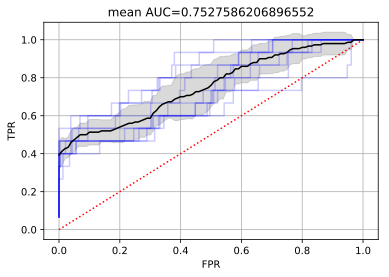

In [24]:
allout = run_cv_experiment(myclassifier, dataX)

meanauc = plotROCs(allout)

write_csv_kaggle('result.csv', allout)

Final AUC with this method was 0.7527, it will be submitted to kaggle!